# Testing Anomaly Detection Models

### **Example:** Store sales anomlies [(More details here)](https://youtu.be/WjpYqvMtYlQ)

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

### 1- Import and visualize the data

In [2]:
df = pd.read_csv('../../data/weekly_sales.csv', parse_dates=['InvoiceDate'])
df.set_index('InvoiceDate', inplace=True)
df.head()

,sales
InvoiceDate,
2010-12-05,2630.31
2010-12-12,2822.51
2010-12-19,2886.73
2010-12-26,417.52
2011-01-02,0.00


<AxesSubplot:xlabel='InvoiceDate'>

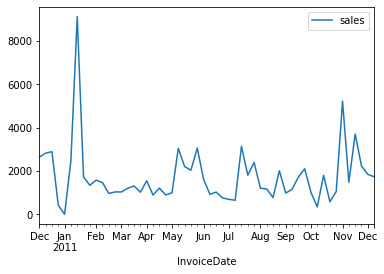

In [3]:
df.plot()

### 2- Find anomalies

In [4]:
df_weekly = df.copy()
anomaly_detector = IsolationForest(n_estimators=150, contamination=.1)
df_weekly.loc[:,'anomalies'] = anomaly_detector.fit_predict(df_weekly.values)

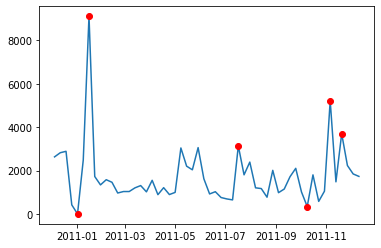

In [5]:
plt.plot(df_weekly.sales)
df_anomaly = df_weekly.query('anomalies==-1')
plt.plot(df_anomaly.sales, 'or')

### 3- Create synthetic anomalies


In [6]:
df_weekly.loc[::3, 'sales'] += .5 * df_weekly.loc[::3, 'sales'].copy()
df_weekly.loc[::3, 'anomalies'] = -1
df_weekly.head()

,sales,anomalies
InvoiceDate,,
2010-12-05,3945.465,-1
2010-12-12,2822.510,1
2010-12-19,2886.730,1
2010-12-26,626.280,-1
2011-01-02,0.000,-1


### 4- Predict with the already trained model

In [7]:
df_weekly.loc[:, 'predictions'] = anomaly_detector.predict(df_weekly[['sales']].values)
df_weekly.head()

,sales,anomalies,predictions
InvoiceDate,,,
2010-12-05,3945.465,-1,-1
2010-12-12,2822.510,1,1
2010-12-19,2886.730,1,1
2010-12-26,626.280,-1,1
2011-01-02,0.000,-1,-1


### 5- Get the accuracy (or other metrics)

In [8]:
f1_score(df_weekly['anomalies'], df_weekly['predictions'])

0.8311688311688311